Question 3 - pure isotherm plots for CO2 and N2 adsorption

David Müller, Léa Lombard, Elisa Lemaire 

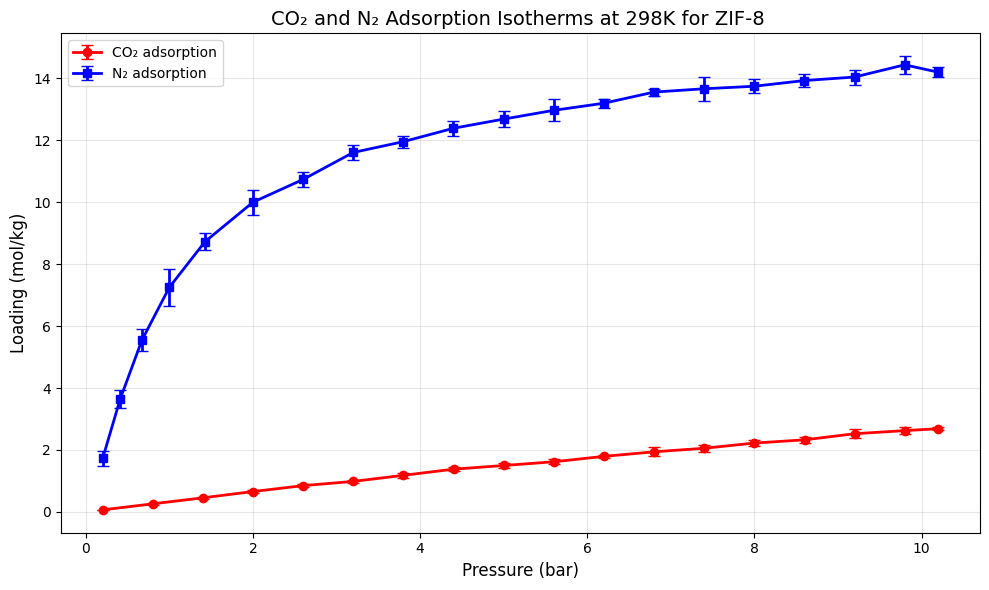

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Read the CSV files for CO2 and N2
df_co2 = pd.read_csv('MG_N2_results.csv')
df_n2 = pd.read_csv('MG_results_CO2.csv')  

def extract_isotherm_data(df, gas_name):
    try:
        isotherm_str = df[df['Key'] == 'isotherm']['Value'].values[0]
        isotherm_data = ast.literal_eval(isotherm_str)
        
        pressure = isotherm_data['pressure']  # in bar
        loading = isotherm_data['loading_absolute_average']  # in mol/kg
        loading_dev = isotherm_data['loading_absolute_dev']  # standard deviation
        
        return pressure, loading, loading_dev, True
    except (KeyError, IndexError, ValueError):
        # If no isotherm data exists, return zeros
        print(f"No isotherm data found for {gas_name} - material may not adsorb this gas")
        return [], [], [], False


pressure_co2, loading_co2, loading_dev_co2, has_co2_data = extract_isotherm_data(df_co2, 'CO₂')
pressure_n2, loading_n2, loading_dev_n2, has_n2_data = extract_isotherm_data(df_n2, 'N₂')

plt.figure(figsize=(10, 6))


plt.errorbar(pressure_co2, loading_co2, yerr=loading_dev_co2, 
             fmt='o-', linewidth=2, markersize=6, capsize=4, color='red',
             label='CO₂ adsorption')

if has_n2_data and len(pressure_n2) > 0:
    plt.errorbar(pressure_n2, loading_n2, yerr=loading_dev_n2,
                 fmt='s-', linewidth=2, markersize=6, capsize=4, color='blue',
                 label='N₂ adsorption')
else:
    plt.plot([], [], 's-', color='blue', label='N₂ adsorption (no adsorption)')

plt.xlabel('Pressure (bar)', fontsize=12)
plt.ylabel('Loading (mol/kg)', fontsize=12)
plt.title('CO₂ and N₂ Adsorption Isotherms at 298K for ZIF-8 ', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)


plt.tight_layout()
plt.show()


question 4- Calculate the CO2 working capacity (WC) for the different structure: Mg, NOTT-300, UTSA-20, UTSA-80, ZIF-8

In [2]:
### This script is used to pass throught all data given on moodle and make an interpolation with pyIAST except for ZIF N2 because the molecule is not absorbed on this MOF.

import pandas as pd
import ast
import numpy as np
import pyiast

# MG N2
file_path = r"MG_N2_results.csv"
data_MG_N2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_MG_N2 = data_MG_N2['Value'].values[34]
isotherm_dict_MG_N2 = ast.literal_eval(isotherm_value_MG_N2)

isotherm_df_MG_N2 = pd.DataFrame(isotherm_dict_MG_N2)
isotherm_df_MG_N2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

MG_N2 = pyiast.InterpolatorIsotherm(isotherm_df_MG_N2,
                                      loading_key="Loading",
                                      pressure_key="pressure",
                                      fill_value=isotherm_df_MG_N2['Loading'].max())

# MG CO2
file_path = r"MG_results_CO2.csv"
data_MG_CO2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_MG_CO2 = data_MG_CO2['Value'].values[34]
isotherm_dict_MG_CO2 = ast.literal_eval(isotherm_value_MG_CO2)

isotherm_df_MG_CO2 = pd.DataFrame(isotherm_dict_MG_CO2)
isotherm_df_MG_CO2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

MG_CO2 = pyiast.InterpolatorIsotherm(isotherm_df_MG_CO2,
                                      loading_key="Loading",
                                      pressure_key="pressure",
                                      fill_value=isotherm_df_MG_CO2['Loading'].max())

# NOTT_N2
file_path = r"NOTT_N2_results.csv"
data_NOTT_N2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_NOTT_N2 = data_NOTT_N2['Value'].values[34]
isotherm_dict_NOTT_N2 = ast.literal_eval(isotherm_value_NOTT_N2)

isotherm_df_NOTT_N2 = pd.DataFrame(isotherm_dict_NOTT_N2)
isotherm_df_NOTT_N2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

NOTT_N2 = pyiast.InterpolatorIsotherm(isotherm_df_NOTT_N2,
                                      loading_key="Loading",
                                      pressure_key="pressure",
                                      fill_value=isotherm_df_NOTT_N2['Loading'].max())

# NOTT_CO2
file_path = r"NOTT_results_CO2.csv"
data_NOTT_CO2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_NOTT_CO2 = data_NOTT_CO2['Value'].values[34]
isotherm_dict_NOTT_CO2 = ast.literal_eval(isotherm_value_NOTT_CO2)

isotherm_df_NOTT_CO2 = pd.DataFrame(isotherm_dict_NOTT_CO2)
isotherm_df_NOTT_CO2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

NOTT_CO2 = pyiast.InterpolatorIsotherm(isotherm_df_NOTT_CO2,
                                       loading_key="Loading",
                                       pressure_key="pressure",
                                       fill_value=isotherm_df_NOTT_CO2['Loading'].max())

# UTSA_20_N2
file_path = r"UTSA_20_N2_results.csv"
data_UTSA_20_N2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_UTSA_20_N2 = data_UTSA_20_N2['Value'].values[34]
isotherm_dict_UTSA_20_N2 = ast.literal_eval(isotherm_value_UTSA_20_N2)

isotherm_df_UTSA_20_N2 = pd.DataFrame(isotherm_dict_UTSA_20_N2)
isotherm_df_UTSA_20_N2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

UTSA_20_N2 = pyiast.InterpolatorIsotherm(isotherm_df_UTSA_20_N2,
                                         loading_key="Loading",
                                         pressure_key="pressure",
                                         fill_value=isotherm_df_UTSA_20_N2['Loading'].max())

# UTSA_80_N2
file_path = r"UTSA_80_N2_results.csv"
data_UTSA_80_N2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_UTSA_80_N2 = data_UTSA_80_N2['Value'].values[34]
isotherm_dict_UTSA_80_N2 = ast.literal_eval(isotherm_value_UTSA_80_N2)

isotherm_df_UTSA_80_N2 = pd.DataFrame(isotherm_dict_UTSA_80_N2)
isotherm_df_UTSA_80_N2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

UTSA_80_N2 = pyiast.InterpolatorIsotherm(isotherm_df_UTSA_80_N2,
                                         loading_key="Loading",
                                         pressure_key="pressure",
                                         fill_value=isotherm_df_UTSA_80_N2['Loading'].max())

# UTSA_20_CO2
file_path = r"UTSA_20_results_CO2.csv"
data_UTSA_20_CO2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_UTSA_20_CO2 = data_UTSA_20_CO2['Value'].values[34]
isotherm_dict_UTSA_20_CO2 = ast.literal_eval(isotherm_value_UTSA_20_CO2)

isotherm_df_UTSA_20_CO2 = pd.DataFrame(isotherm_dict_UTSA_20_CO2)
isotherm_df_UTSA_20_CO2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

UTSA_20_CO2 = pyiast.InterpolatorIsotherm(isotherm_df_UTSA_20_CO2,
                                          loading_key="Loading",
                                          pressure_key="pressure",
                                          fill_value=isotherm_df_UTSA_20_CO2['Loading'].max())

# UTSA_80_CO2
file_path = r"UTSA_80_results_CO2.csv"
data_UTSA_80_CO2 = pd.read_csv(file_path, delimiter = ',')

isotherm_value_UTSA_80_CO2 = data_UTSA_80_CO2['Value'].values[34]
isotherm_dict_UTSA_80_CO2 = ast.literal_eval(isotherm_value_UTSA_80_CO2)

isotherm_df_UTSA_80_CO2 = pd.DataFrame(isotherm_dict_UTSA_80_CO2)
isotherm_df_UTSA_80_CO2.rename(columns={'loading_absolute_average': 'Loading'}, inplace=True)

UTSA_80_CO2 = pyiast.InterpolatorIsotherm(isotherm_df_UTSA_80_CO2,
                                          loading_key="Loading",
                                          pressure_key="pressure",
                                          fill_value=isotherm_df_UTSA_80_CO2['Loading'].max())

ModuleNotFoundError: No module named 'pyiast'

In [ ]:
### Calculate the q of CO2 and N2 in the same gas mixture with pyIAST

MOF_list = ['MG','NOTT','UTSA_20','UTSA_80','ZIF']

MG_N2_inter=[]
MG_CO2_inter = []
NOTT_N2_inter = []
NOTT_CO2_inter = []
UTSA_20_N2_inter = []
UTSA_80_N2_inter = []
UTSA_20_CO2_inter = []
UTSA_80_CO2_inter = []
#ZIF_CO2_inter = []  does not exist because N2 is not absorbed by ZIF
#ZIF_N2_inter = []


y = np.array([0.85, 0.15])  # gas mole fractions N2 / CO2
pressure_values_list=[0.2,0.8,1,1.4,  2 ,  2.6,  3.2,  3.8,  4.4,  5 ,  5.6 , 6.2,  6.8 , 7.4 , 8,  8.6,  9.2,  9.8, 10.2]
for i in pressure_values_list:
    q_MG = pyiast.iast(i * y, [MG_N2, MG_CO2], verboseflag=False)
    MG_N2_inter.append(q_MG[0])
    MG_CO2_inter.append(q_MG[1])

    q_NOTT = pyiast.iast(i * y, [NOTT_N2, NOTT_CO2], verboseflag=False)
    NOTT_N2_inter.append(q_NOTT[0])
    NOTT_CO2_inter.append(q_NOTT[1])

    q_UTSA_20 = pyiast.iast(i * y, [UTSA_20_N2, UTSA_20_CO2], verboseflag=False)
    UTSA_20_N2_inter.append(q_UTSA_20[0])
    UTSA_20_CO2_inter.append(q_UTSA_20[1])

    q_UTSA_80 = pyiast.iast(i * y, [UTSA_80_N2, UTSA_80_CO2], verboseflag=False)
    UTSA_80_N2_inter.append(q_UTSA_80[0])
    UTSA_80_CO2_inter.append(q_UTSA_80[1])

                      Component 0: p^0 = 10.446788 > 10.200000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 0: p^0 = 12.531347 > 10.200000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 0: p^0 = 14.582831 > 10.200000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 0: p^0 = 17.940278 > 10.200000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
         

In [ ]:
### Plot the dataframe with WC(CO2) calculations for each structure.

#The data was extracted from the interpolation made in the previous script at 0.2 bar and 1 bar.
IASTdata = {
    "compound": ["Mg", "NOTT", "USTA_20", "UTSA_80"],
    "adsorption_1bar": [MG_CO2_inter[2], NOTT_CO2_inter[2], UTSA_20_CO2_inter[2],UTSA_80_CO2_inter[2]],
    "desorption_0,2bar": [MG_CO2_inter[0], NOTT_CO2_inter[0], UTSA_20_CO2_inter[0], UTSA_80_CO2_inter[0]],
}

df = pd.DataFrame(IASTdata)

df["WC_CO2"] = df["adsorption_1bar"] - df["desorption_0,2bar"]
print(df)

  compound  adsorption_1bar  desorption_0,2bar    WC_CO2
0       Mg         1.282747           0.258807  1.023939
1     NOTT         3.477616           0.717414  2.760202
2  USTA_20         0.587356           0.118507  0.468849
3  UTSA_80         0.249778           0.051253  0.198525


From the dataframe we can compare the working capacity of different compounds. We see that the NOTT MOF has a larger value than other compound (more than 2 times the working capacity of MG).

question 6-

In [ ]:
### Give the selectivity of CO2 over N2 with the different MOF at 1 bar

def selectivity(qco2, qn2, xn2=0.85, xco2=0.15):
    '''
    Calculate the selectivity with the function gave
    '''
    s=qco2*xn2/(qn2*xco2)
    return s

#calculate selctivity
the_selectivity_MG=[]
the_selectivity_NOTT=[]
the_selectivity_UTSA20=[]
the_selectivity_UTSA80=[]
for i in range (len(pressure_values_list)):
    the_selectivity_MG.append(selectivity(qco2=MG_CO2_inter[i], qn2=MG_N2_inter[i]))
    the_selectivity_NOTT.append(selectivity(qco2=NOTT_CO2_inter[i], qn2=NOTT_N2_inter[i]))
    the_selectivity_UTSA20.append(selectivity(qco2=UTSA_20_CO2_inter[i], qn2=UTSA_20_N2_inter[i]))
    the_selectivity_UTSA80.append(selectivity(qco2=UTSA_80_CO2_inter[i], qn2=UTSA_80_N2_inter[i]))

print(f'The Mg selectivity at 1 bar is : {the_selectivity_MG[2]}', end='\n\n')
print(f'The Nott selectivity at 1 bar is : {the_selectivity_NOTT[2]}', end='\n\n')
print(f'The UTSA 20 selectivity at 1 bar is : {the_selectivity_UTSA20[2]}', end='\n\n')
print(f'The UTSA 80 selectivity at 1 bar is : {the_selectivity_UTSA80[2]}', end='\n\n')

The Mg selectivity at 1 bar is : 27.011329729998472

The Nott selectivity at 1 bar is : 29.775418475995714

The UTSA 20 selectivity at 1 bar is : 9.533948461802511

The UTSA 80 selectivity at 1 bar is : 5.21897820433235



question-6

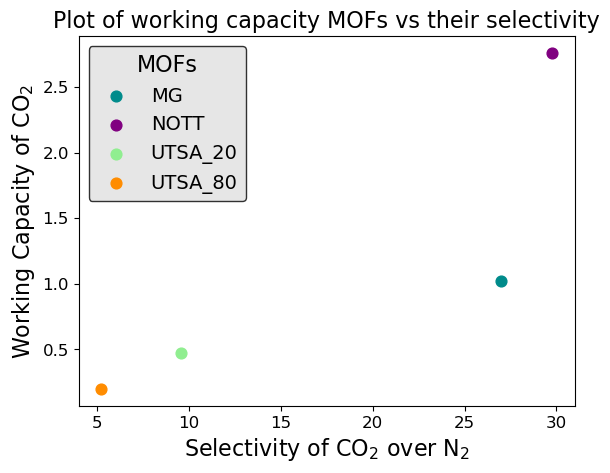

In [ ]:
### Script to make a graphic of WC vs S

import matplotlib.pyplot as plt
WC = [UTSA_80_CO2_inter[2]-UTSA_80_CO2_inter[0], UTSA_20_CO2_inter[2]-UTSA_20_CO2_inter[0],  NOTT_CO2_inter[2]- NOTT_CO2_inter[0],MG_CO2_inter[2]-MG_CO2_inter[0]]

WC_inverse=WC[::-1]
#values = values.apply(lambda x: x.str.replace(',','.').astype(float))  # replace all ',' by '.'


### Make a graphic of the values
csfont = {'fontname':'DejaVu Sans'}

fig, ax = plt.subplots()  # create a figure
ax.set_title('Plot of working capacity MOFs vs their selectivity',fontsize='16', **csfont)

ax.scatter([the_selectivity_MG[2]], WC_inverse[0], color='darkcyan', zorder=2, label="MG", s=60)
ax.scatter([the_selectivity_NOTT[2]], WC_inverse[1], color='purple', zorder=2, label="NOTT", s=60)
ax.scatter([the_selectivity_UTSA20[2]], WC_inverse[2], color='lightgreen', zorder=2, label="UTSA_20", s=60)
ax.scatter([the_selectivity_UTSA80[2]], WC_inverse[3], color='darkorange', zorder=2, label="UTSA_80", s=60)

### Use if needed
# ax.set_xlim(min_value_x, max_value_x)  # Adjust min_value_x and max_value_x according to your data
# ax.set_ylim(min_value_y, max_value_y)  # Adjust min_value_y and max_value_y according to your data

ax.set_xlabel("Selectivity of CO$_2$ over N$_2$", fontsize='16', **csfont)  # label the x axis
ax.set_ylabel("Working Capacity of CO$_2$", fontsize='16', **csfont)  #label the y axis
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust labelsize as needed

legend = ax.legend(loc='upper left', prop={'family':'DejaVu Sans', 'size':14})  # Set the title and position of the legend, also size of the legend labels
legend.set_title('MOFs', prop={'size': 16})  # Set the title font size
legend.get_title().set_fontname('DejaVu Sans')
legend.get_frame().set_facecolor('#e0e0e0')  # Set the background color of the legend
legend.get_frame().set_edgecolor('black')  # Set the edge color of the legend frame
plt.savefig("plot_WCvsS.png", dpi=600)

On this graphic, one sees UTSA 20 and 80 are MOFs which have a low selectivity (CO2/N2) and working capacity compare to Mg and NOTT MOFs. Concerning the two last, Mg has a better selectivity than NOTT but only ~4% of difference but the working capacity of NOTT is two times higher than Mg. Therefore, one can assume with the help of pyIAST that NOTT is a better MOF to captured CO2 in this type of system.